<a href="https://colab.research.google.com/github/just-joseph/NLP-basics/blob/main/Day3_Text_classification_(vectorization%2B_ML)%2C_text_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cosine Similarity using tfidf

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [109]:
#documents
corpus= ["I work as software engineer.", "I am a cinephile.", "I love treks."]
tfidfvectorizer = TfidfVectorizer()
tfidfvectorizer.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [110]:
tfidf_test_vectors= tfidfvectorizer.transform( corpus ).toarray()
tfidf_query_vector= tfidfvectorizer.transform( ['I love to build and engineer software.'] ).toarray()
print(tfidf_query_vector)

[[0.         0.         0.         0.57735027 0.57735027 0.57735027
  0.         0.        ]]


In [111]:
print(cosine_similarity( tfidf_test_vectors, tfidf_query_vector ) )

[[0.57735027]
 [0.        ]
 [0.40824829]]


In [112]:
tfidf_test_vectors= tfidfvectorizer.transform( corpus ).toarray()
tfidf_query_vector= tfidfvectorizer.transform( ['My profession is related to computers'] ).toarray()

In [113]:
print(cosine_similarity( tfidf_test_vectors, tfidf_query_vector ) )

[[0.]
 [0.]
 [0.]]


### Cosine Similarity using Spacy (using pretrained spacy sm model for English)

In [105]:
!pip install spacy
!pip install en-core-web-sm

In [96]:
import spacy
nlp= spacy.load("en_core_web_sm")

In [106]:
sentences= ["I work as a software engineer.", "I am a cinephile.", "I love treks."]
query= ['My profession is related to computers']

sentence_vectors=[]
for doc in nlp.pipe(sentences):
    sentence_vectors.append(doc.vector)
clause_vector=[]
for doc in nlp.pipe( query ):
    clause_vector.append(doc.vector)

In [107]:
sentence_vectors[0]

array([ 0.42306647,  0.410245  , -0.21554174, -1.0574677 ,  0.56674945,
       -0.65784615,  0.71261966,  1.3172448 ,  1.5559533 ,  0.9395925 ,
       -0.6180364 , -0.00714145, -0.47274384, -0.3331472 , -0.29177096,
       -1.5721703 , -0.8411566 , -0.9079747 , -0.3509024 , -0.04010289,
        0.48536736,  0.83592623,  0.784914  , -0.04399982, -2.3147044 ,
        0.5319873 , -0.44756716, -0.8045259 ,  0.93263996, -0.8893102 ,
        1.0646421 ,  1.2814503 ,  0.9157917 ,  0.14049768,  0.18912308,
       -2.1003816 , -0.04817145, -1.0376045 , -0.03952559, -0.4662034 ,
        1.6607322 , -0.49522597,  0.97951376, -1.7778645 ,  0.9311367 ,
       -1.3178028 ,  0.5249395 ,  0.76417106, -2.3682735 ,  1.2034246 ,
        0.36784664, -1.8730861 ,  0.6806672 ,  0.9046923 , -1.712573  ,
        0.54825383,  1.4249355 , -0.29313308, -0.24200244,  1.0566458 ,
        0.41982612,  0.21106339,  1.8621495 ,  0.66706425, -0.29118863,
       -0.06374728, -0.22001018, -1.770602  , -0.7503467 , -0.07

In [108]:
print(cosine_similarity( sentence_vectors, clause_vector ) )

[[0.5140746 ]
 [0.35023063]
 [0.25728053]]


In [10]:
## importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Case 1 : Would use Word2Vec and then apply different classifiers
from gensim.models import Word2Vec  

## Case 2 : Would use TfidfVectorizer and then apply different classifiers
from sklearn.feature_extraction.text import TfidfVectorizer   

## This would help us understand : Does the type of Vectorizing Process influence the precision , accuracy , recall score of the classifiers ??


from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Read data frame
file_url = 'https://raw.githubusercontent.com/just-joseph/NLP-basics/main/bbc-text.csv'
df = pd.read_csv(file_url)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


SHAPE OF DATASET:  (2225, 2) 

COLUMNS IN DATASET:  Index(['category', 'text'], dtype='object') 

CATEGORIES:  ['tech' 'business' 'sport' 'entertainment' 'politics'] 


NUMBER OF SAMPLES IN EACH CATEGORY: 



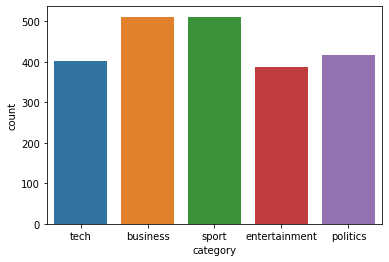

In [12]:
## Doing basic EDA ( Exploratory Data Analysis )

# Description of the dataset
print('SHAPE OF DATASET: ', df.shape, '\n\nCOLUMNS IN DATASET: ', df.columns, '\n\nCATEGORIES: ', df.category.unique(), '\n\n')

# Plotting number of samples within each category
print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(df.category)

Note : Data set seems balanced. Just in case if it was highly imbalanced say any one category had more than 50% entries then , we could have used SMOTHE (Synthetic Minority Over-sampling Technique) over the Minor classes and undersampling of Major class.

In [13]:
df['category']

0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2220         business
2221         politics
2222    entertainment
2223         politics
2224            sport
Name: category, Length: 2225, dtype: object

In [14]:
# DATA CLEANING
print('Data cleaning in progress...')

# Tokenize : dividing Sentences into words
df['text_clean'] = df['text'].apply(nltk.word_tokenize)
print('Tokenization complete.')


# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("english"))
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
print('Stop words removed.')


# Remove numbers, punctuation and special characters (only keep words)
regex = '[a-z]+'
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])
print('Numbers, punctuation and special characters removed.')


# Lemmatization : lemma means base form of a word.  // Example : leaf and leaves get lemmatized to leaf
lem = nltk.stem.wordnet.WordNetLemmatizer()
df['text_clean'] = df['text_clean'].apply(lambda x: [lem.lemmatize(item, pos='v') for item in x])
print('Lemmatization complete.\nData cleaning complete.\n')

Data cleaning in progress...
Tokenization complete.
Stop words removed.
Numbers, punctuation and special characters removed.
Lemmatization complete.
Data cleaning complete.



In [22]:
# Classification using word2vec vectorizer

vec_model = Word2Vec(df['text_clean'])

w2v = dict(zip(vec_model.wv.index2word, vec_model.wv.syn0))
## What is syn0 ?
## https://stackoverflow.com/questions/53301916/python-gensim-what-is-the-meaning-of-syn0-and-syn0norm

class Vectorizer(object):
    
    def __init__(self, vec):
        self.vec = vec
        self.dim = len(vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.vec[w] for w in words if w in self.vec] or [np.zeros(self.dim)], axis=0) for words in X])


## for any Classifier , we need intialise the model with the parameters. 
## Further I am applying GridSearchCV for 5 runs (i.e 1/5th data used each time for testing) 
## So the model gets trained over 5 runs 
## as well we are predicting also over 5 runs
## In case if you wish to know about Cross Validation , you can watch the Video here : https://www.youtube.com/watch?v=LmxsySwAhoE&t=84s
class Classifier(object):
    
    def __init__(self, model, param):
        self.model = model
        self.param = param
        self.gs = GridSearchCV(self.model, self.param, cv=5, error_score=0, refit=True)        

    def fit(self, X, y):        
        return self.gs.fit(X, y)

    def predict(self, X):
        return self.gs.predict(X)
    

## Preparing to make a pipeline 
## What to know about Pipelining : see this https://www.youtube.com/watch?v=Y4iJfKX_QeQ&t=52s
clf_models = {
    'Naive Bayes': GaussianNB(), 
    # 'SVC': SVC(),
    # 'Decision Tree': DecisionTreeClassifier(),  
    # 'Perceptron': MLPClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier()
}

clf_params = {
    'Naive Bayes': { }, 
    # 'SVC': { 'kernel': ['linear', 'rbf'] },
    # 'Decision Tree': { 'min_samples_split': [2, 5] }, 
    # 'Perceptron': { 'activation': ['tanh', 'relu'] },
    # 'Gradient Boosting': { 'min_samples_split': [2, 5] }
}


## splitting the dataset into 80:20.  have kept shuffle=True , so that the data is randomly sampled or simply said shuffled , and then split.
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, shuffle=True)

## for loop traverses , each and every classifier and its corresponding parameters.
for key in clf_models.keys():
    
    clf = Pipeline([('Word2Vec vectorizer', Vectorizer(w2v)), ('Classifier', Classifier(clf_models[key], clf_params[key]))])
    
    clf.fit(X_train, y_train)  ## Note : we are calling user defined fit method. This fit method uses Cross Validation
    y_pred = clf.predict(X_test)  ## Note : we are calling user defined predict method. This predict method uses Cross Validation
    
    ## printing performance metrics for each classifier 
    print(key, ':')
    print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))

Naive Bayes :
Accuracy: 0.346 	Precision: 0.341 	Recall: 0.332 		F1: 0.316



In [23]:
# Classification using TFIDF vectorizer

# Vectorize training and testing data. Here we would pass TfidfVectorizer() to vec 
def Vectorize(vec, X_train, X_test):    
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    
    print('Vectorization complete.\n')
    
    return X_train_vec, X_test_vec


# Use multiple classifiers and grid search for prediction
def ML_modeling(models, params, X_train, X_test, y_train, y_test):    
    
    if not set(models.keys()).issubset(set(params.keys())):
        raise ValueError('Some estimators are missing parameters')

    for key in models.keys():
    
        model = models[key]
        param = params[key]
        gs = GridSearchCV(model, param, cv=5, error_score=0, refit=True)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        
        # Print scores for the classifier
        print(key, ':', gs.best_params_)
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))
    
    return


## Preparing to make a pipeline 
models = {
    'Naive Bayes': MultinomialNB(), 
    # 'Decision Tree': DecisionTreeClassifier(),  
    # 'Perceptron': MLPClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier()   ## This model would take a little longer to run 
}

params = {
    'Naive Bayes': { 'alpha': [0.5, 1], 'fit_prior': [True, False] }, 
    # 'Decision Tree': { 'min_samples_split': [1, 2, 5] }, 
    # 'Perceptron': { 'alpha': [0.0001, 0.001], 'activation': ['tanh', 'relu'] },
    # 'Gradient Boosting': { 'learning_rate': [0.05, 0.1], 'min_samples_split': [2, 5] }
}


# Encode label categories to numbers
enc = LabelEncoder()
df['category'] = enc.fit_transform(df['category'])
labels = list(enc.classes_)

# Train-test split and vectorize
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, shuffle=True)
X_train_vec, X_test_vec = Vectorize(TfidfVectorizer(), X_train, X_test)

ML_modeling(models, params, X_train_vec, X_test_vec, y_train, y_test)
## ML_modeling method also prints performance scores for each classifier


Vectorization complete.

Naive Bayes : {'alpha': 0.5, 'fit_prior': False}
Accuracy: 0.964 	Precision: 0.965 	Recall: 0.963 		F1: 0.963



Conclusion of this Ananlysis : TfidfVectorizer seems to have performed far better than Word2Vec vectorizer. So with this simple excerise , its proved that we should prefer to use TfidfVectorizer for most Text (NLP) applications.

Tfidf is useful when the embedding/ vectorization is created using our own corpus. But if we have access to huge corpuses of data, Word2vec outperforms Tfidf. Better, if we have pre-trained Word2vec embeddings (pre-trained on huge data), go for Word2vec than tfidf as the former would have better English language understanding.